In [1]:
import autograd.numpy as np
from autograd import grad, jacobian
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

print("done")

done


In [2]:
# Parameters
nx = 10
ny = 10
xmin = 0
xmax = 2
ymin = 0
ymax = 1

# Initialization
x_space  = np.linspace(xmin, xmax, nx)
y_space  = np.linspace(xmin, xmax, ny)

print("done")

done


In [3]:
#Baymani, Modjtaba, Asghar Kerayechian, and Sohrab Effati. 
#"Artificial neural networks approach for solving stokes problem." Applied Mathematics 1, no. 04 (2010): 288-292
def analytic_solution_u(x,y):
    u = 10*np.power(x,2)*y*np.power(1-x,2)*(1-3*y+2*np.power(y,2))
    return u
def analytic_solution_v(x,y):
    v = -10*np.power(y,2)*x*np.power(1-y,2)*(1-3*x+2*np.power(x,2))
    return v
def analytic_solution_p(x,y):
    p = 5*(np.power(x,2)-np.power(y,2))
    return p

surface = np.zeros((ny, nx))

for i, xi in enumerate(x_space):
    for j, yj in enumerate(y_space):
        surface[i][j] = analytic_solution_p(xi, yj)

print("done")

done


In [5]:
#https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c
def p(x,y):
    return 5*(np.power(x,2)-np.power(y,2))

def g0(x):
    return p(x,0)

def g1(x):
    return p(x,1)

def h0(y):
    return p(0,y)

def h1(y):
    return p(1,y)

def f(x):
    return 0.

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def A2(x):
    return x[1] * np.sin(np.pi * x[0])

def A(x): #from paper
    part_1 = (1-x[0])*h0(x[1])+x[0]*h1(x[1])
    part_2 = (1-x[1])*(g0(x[0])-((1-x[0])*(g0(0))+x[0]*g0(1)))
    part_3 = x[1]*(g1(x[0])-((1-x[0])*g1(0)+x[0]*g1(1)))
    return part_1+part_2+part_3

def p_trial(x, net_out):
    return A(x) + x[0] * (1 - x[0]) * x[1] * (1 - x[1]) * net_out


def loss_function(W, x, y):
    loss_sum = 0.
    
    for xi in x:
        for yi in y:
            
            input_point = np.array([xi, yi])
            
            net_out = neural_network(W, input_point)[0]

            net_out_jacobian = jacobian(neural_network_x)(input_point)
            net_out_hessian = jacobian(jacobian(neural_network_x))(input_point)
            
            p_t = p_trial(input_point, net_out)
            p_t_jacobian = jacobian(p_trial)(input_point, net_out)
            p_t_hessian = jacobian(jacobian(p_trial))(input_point, net_out)

            gradient_of_trial_d2x = p_t_hessian[0][0]
            gradient_of_trial_d2y = p_t_hessian[1][1]

            func = f(input_point) # right part function

            err_sqr = np.power(((gradient_of_trial_d2x + gradient_of_trial_d2y) - func),2)
            loss_sum += err_sqr
        
    return loss_sum

W = [npr.randn(2, 10), npr.randn(10, 1)]
learning_rate = 0.001

print neural_network(W, np.array([1, 1]))

for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space, y_space)
    W[0] = W[0] - learning_rate * loss_grad[0]
    W[1] = W[1] - learning_rate * loss_grad[1]

print loss_function(W, x_space, y_space)

surface_p_nn = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        net_outt = neural_network(W, [x, y])[0]
        surface_p_nn[i][j] = p_trial([x, y], net_outt)

print("done")

[0.62311641]
43.96645016457554
done


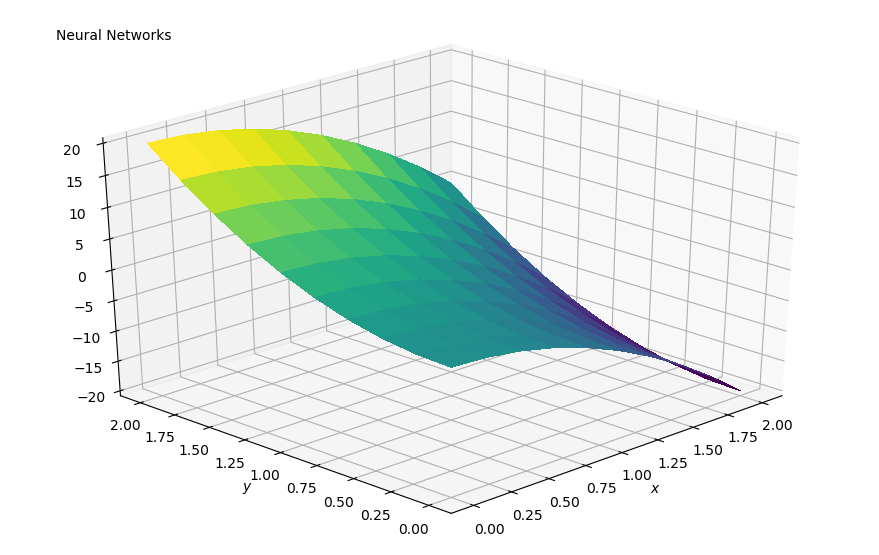

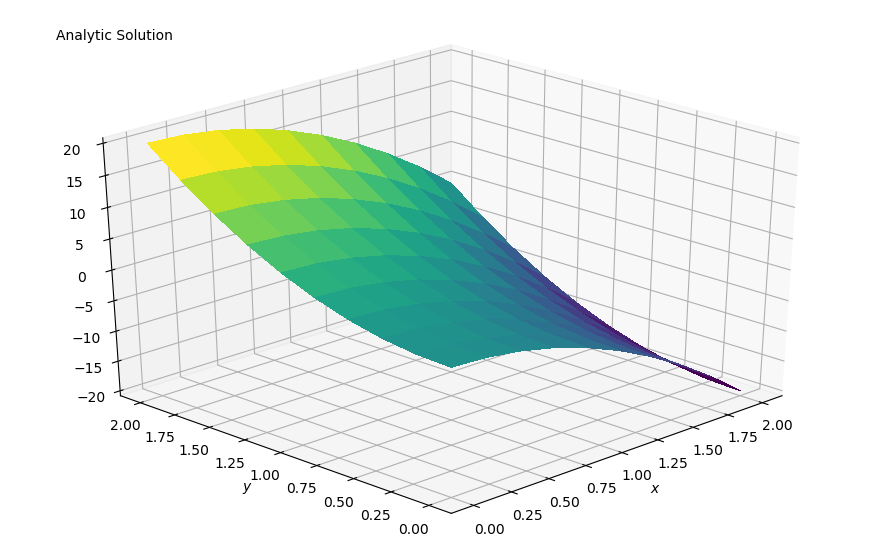

In [6]:
def plot2D(x, y, p,title):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.text2D(0.05, 0.95, title, transform=ax.transAxes)

x_space  = np.linspace(xmin, xmax, nx)
y_space  = np.linspace(xmin, xmax, ny)

plot2D(x_space,y_space,surface_p_nn,"Neural Networks")
plot2D(x_space,y_space,surface,"Analytic Solution")

In [7]:
l2_norm_sum = 0.0
l2_norm = np.zeros((ny, nx))
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        l2_norm[i][j] = np.power((surface[i][j]-surface_p_nn[i][j]),2)
        l2_norm_sum = l2_norm_sum + l2_norm[i][j] 

print("L2-norm = " + str(l2_norm_sum))

L2-norm = 0.014919002007328859


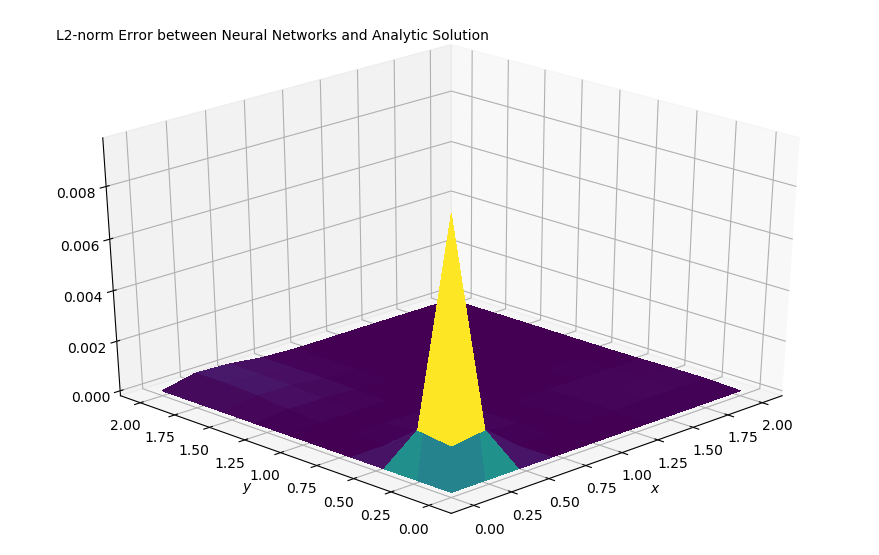

In [8]:
plot2D(x_space,y_space,l2_norm,"L2-norm Error between Neural Networks and Analytic Solution")